k is hyper parameter

easy to understand/very intutive
performance of the model in terms of evaluations is good

disAdv
- model is not robust to outliers
- computions time is high --> lazy learners (because of brute force )


variant of knn
- k-d tree - partition the data into binary tree (so reduce the search time)
- ball tree

kNN use when small data set 




- kNN Classifier Tutorial
    - https://www.kaggle.com/code/prashant111/knn-classifier-tutorial



https://keylabs.ai/blog/k-nearest-neighbors-knn-real-world-applications/

https://www.analyticsvidhya.com/blog/2020/02/4-types-of-distance-metrics-in-machine-learning/

# K-Nearest Neighbors (K-NN)

#### What is K-NN?

**K-Nearest Neighbors (K-NN)** is a simple, instance-based learning algorithm used for both classification and regression tasks. The basic idea is to predict the output of a new data point based on the majority class (in classification) or average (in regression) of its \( K \) closest training samples in the feature space. It is a non-parametric method, meaning it does not assume any underlying distribution of the data.

#### KNN Algorithm

The K-NN algorithm consists of the following steps:

1. **Choose the value of \( K \)**: Select the number of neighbors to consider.
2. **Calculate the distance**: Measure the distance between the input data point and all training data points. Common distance metrics include:
   - Euclidean distance
   - Manhattan distance
   - Minkowski distance
3. **Find the K nearest neighbors**: Identify the \( K \) training samples closest to the input data point.
4. **Make a prediction**:
   - **For classification**: Assign the class label that appears most frequently among the K neighbors.
   - **For regression**: Calculate the average of the values of the K neighbors.

#### Working of K-NN

1. **Distance Calculation**: For a new data point, compute its distance from each point in the training dataset using a distance metric.
2. **Sorting**: Sort all the distances in ascending order.
3. **Selecting Neighbors**: Select the top \( K \) entries from the sorted list.
4. **Voting (for classification)** or **Averaging (for regression)**: For classification, perform a majority vote among the selected neighbors. For regression, compute the mean of the selected neighbors.

### How to Choose the Value of K?

Choosing the right value of \( K \) is crucial for the performance of K-NN:

1. **Odd vs. Even**: In classification tasks, choose an odd value of \( K \) to avoid ties.
2. **Cross-Validation**: Use techniques like k-fold cross-validation to determine the best value of \( K \). Train the model on subsets of data and evaluate it on the remaining data.
3. **Testing Range**: Experiment with different values of \( K \) (e.g., 1, 3, 5, 7, etc.) and observe the model's performance metrics (accuracy, F1 score, etc.).
4. **Bias-Variance Tradeoff**:
   - **Small \( K \)**: May lead to high variance and overfitting (model captures noise).
   - **Large \( K \)**: May lead to high bias and underfitting (model oversimplifies).

### Assignment

To reinforce your understanding of K-NN, try the following tasks:

1. **Implement K-NN**:
   - Use a dataset (like the Iris dataset) to implement the K-NN algorithm from scratch in Python.
   - Measure the accuracy for different values of \( K \) and plot the results.

2. **Experiment with Different Datasets**:
   - Apply K-NN to other datasets, such as the Wine dataset or any custom dataset, and analyze its performance.
   - Consider using different distance metrics and compare the results.

3. **Visualization**:
   - Visualize the decision boundary of K-NN on a 2D dataset to understand how changing \( K \) affects the model's predictions.

4. **Explore Libraries**:
   - Use libraries like `scikit-learn` to implement K-NN and compare its results with your custom implementation.

### Example Code for K-NN


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [5]:
# create daataset or Load the dataset
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 1000, n_features=3, n_redundant=0, n_classes=2, random_state=1)


In [6]:
X

array([[ 0.60500791,  0.51340375, -1.55859419],
       [ 0.81846819, -1.88473945,  1.49992516],
       [ 0.53437474, -0.01420736,  0.2771265 ],
       ...,
       [ 2.28830983,  3.74857955, -0.5886461 ],
       [-0.28103796, -1.84729902,  1.13548397],
       [ 0.76642645, -1.29293146,  0.88279907]])

In [7]:
y

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [8]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [9]:
X_train

array([[ 0.13696193,  0.67815108, -0.14461932],
       [ 0.57366538, -1.25590314,  0.34284631],
       [-1.87258854,  1.20568569,  0.11236385],
       ...,
       [ 0.62279308, -1.56698137,  0.65941881],
       [ 1.02164878, -0.10923548, -1.20447744],
       [-1.5870461 , -2.72691664, -0.23260288]])

In [10]:
X_train.shape, X_test.shape

((700, 3), (300, 3))

In [11]:
# import MOdel
from sklearn.neighbors import KNeighborsClassifier

In [24]:
## Create a K-NN classifier with K=3  k value 
k = 3

clf = KNeighborsClassifier(n_neighbors=k)

In [25]:

clf = KNeighborsClassifier()
clf

KNeighborsClassifier()

In [26]:
# Train the model
clf.fit(X_train, y_train)


KNeighborsClassifier()

In [27]:
# Make predictions
y_pred = clf.predict(X_test)

In [28]:
y_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1])

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"K-NN Accuracy (K={k}): {accuracy:.2f}")
print(confusion_matrix(y_test,y_pred))


K-NN Accuracy (K=3): 0.85
[[122  23]
 [ 21 134]]


In [23]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       145
           1       0.85      0.86      0.86       155

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



In [ ]:
# Hyperparameter tuning

In [30]:
param_grid = {"n_neighbors": [3, 5, 6, 7, 10, 12, 15],
             'algorithm': ['ball_tree', 'brute', 'kd_tree'],
             'leaf_size': [20, 30, 40 , 50]}

In [31]:
param_grid

{'n_neighbors': [3, 5, 6, 7, 10, 12, 15],
 'algorithm': ['ball_tree', 'brute', 'kd_tree'],
 'leaf_size': [20, 30, 40, 50]}

In [47]:
# tuning the model
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv = 2, verbose=3)
grid

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'brute', 'kd_tree'],
                         'leaf_size': [20, 30, 40, 50],
                         'n_neighbors': [3, 5, 6, 7, 10, 12, 15]},
             verbose=3)

In [48]:
grid.fit(X_train, y_train)

Fitting 2 folds for each of 84 candidates, totalling 168 fits
[CV 1/2] END algorithm=ball_tree, leaf_size=20, n_neighbors=3;, score=0.834 total time=   0.0s
[CV 2/2] END algorithm=ball_tree, leaf_size=20, n_neighbors=3;, score=0.834 total time=   0.0s
[CV 1/2] END algorithm=ball_tree, leaf_size=20, n_neighbors=5;, score=0.823 total time=   0.0s
[CV 2/2] END algorithm=ball_tree, leaf_size=20, n_neighbors=5;, score=0.846 total time=   0.0s
[CV 1/2] END algorithm=ball_tree, leaf_size=20, n_neighbors=6;, score=0.814 total time=   0.0s
[CV 2/2] END algorithm=ball_tree, leaf_size=20, n_neighbors=6;, score=0.843 total time=   0.0s
[CV 1/2] END algorithm=ball_tree, leaf_size=20, n_neighbors=7;, score=0.843 total time=   0.0s
[CV 2/2] END algorithm=ball_tree, leaf_size=20, n_neighbors=7;, score=0.849 total time=   0.0s
[CV 1/2] END algorithm=ball_tree, leaf_size=20, n_neighbors=10;, score=0.854 total time=   0.0s
[CV 2/2] END algorithm=ball_tree, leaf_size=20, n_neighbors=10;, score=0.846 total

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'brute', 'kd_tree'],
                         'leaf_size': [20, 30, 40, 50],
                         'n_neighbors': [3, 5, 6, 7, 10, 12, 15]},
             verbose=3)

In [35]:
grid.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 12}

In [36]:
grid.best_score_

np.float64(0.8528571428571429)

In [37]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

In [38]:
accuracy_score(y_test, y_pred)

0.87

#### KNN use as missing value treatment


In [ ]:
#knn as misisng value treatment

import numpy as np
from sklearn.impute import KNNImputer
X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]


In [ ]:
print(X)

[[1, 2, nan], [3, 4, 3], [nan, 6, 5], [8, 8, 7]]


In [ ]:
imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

## KNN Regression code



### Explanation of the Code

1. **Import Libraries**: We import necessary libraries for data generation, model training, and visualization.

2. **Create a Synthetic Dataset**: 
   - We use the `make_regression` function to generate a synthetic regression dataset with one feature. The `noise` parameter adds variability to the target variable.

3. **Split the Data**: 
   - The dataset is split into training (70%) and testing (30%) sets using `train_test_split`.

4. **Create the Regressor**: 
   - A `KNeighborsRegressor` is created with \( K = 5 \).

5. **Train the Model**: 
   - The model is trained on the training data using the `fit` method.

6. **Make Predictions**: 
   - Predictions are made on the test set using the `predict` method.

7. **Evaluate Performance**: 
   - The Mean Squared Error (MSE) and R² score are calculated to evaluate the model's performance.

8. **Visualize Predictions**: 
   - A scatter plot is created to show the actual vs. predicted values, allowing for a visual assessment of model performance.

### Conclusion

This example demonstrates how to implement K-NN for regression tasks using `scikit-learn`. You can experiment with different values of \( K \), different datasets, and various distance metrics to see how they affect the model's performance.

In [ ]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Create a synthetic regression dataset
from sklearn.datasets import make_regression
X, y = make_regression(n_samples = 1000, n_features=3,noise = 3, random_state=1)
X
y

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train.shape, X_test.shape

# Create a K-NN Regressor 
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor()

# Train the model
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)

# Evaluate the model
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"K-NN Regression Mean Squared Error: {mse:.2f}")
print(f"K-NN Regression R^2 Score: {r2:.2f}")



# hyperparameter tuning
param_grid = {"n_neighbors": [3, 5, 6, 7, 10, 12, 15],
             'algorithm': ['ball_tree', 'brute', 'kd_tree'],
             'leaf_size': [20, 30, 40 , 50]}

param_grid

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=reg, param_grid=param_grid, cv = 5, verbose=3)
grid

grid.fit(X_train, y_train)



In [ ]:

grid.best_params_

grid.best_score_

np.float64(0.9687257312132287)

### also show ploting when number of features in 1

K-NN Regression Mean Squared Error: 340.60
K-NN Regression R^2 Score: 0.96


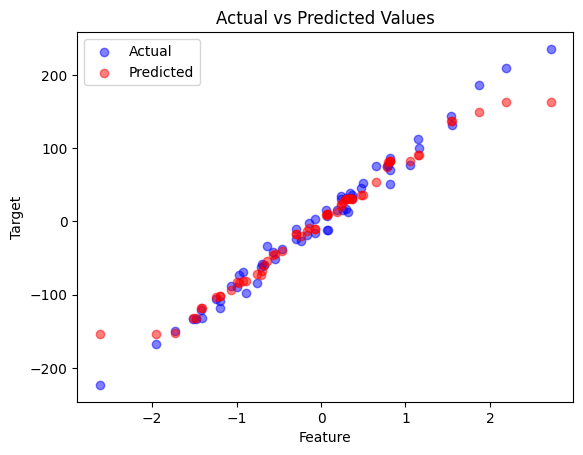

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a synthetic regression dataset
X, y = make_regression(n_samples=200, n_features=1, noise=10, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a K-NN Regressor with K=5
k = 5
knn_regressor = KNeighborsRegressor(n_neighbors=k)

# Train the model
knn_regressor.fit(X_train, y_train)

# Make predictions
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"K-NN Regression Mean Squared Error: {mse:.2f}")
print(f"K-NN Regression R^2 Score: {r2:.2f}")

# Visualize the predictions
plt.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(X_test, y_pred, color='red', label='Predicted', alpha=0.5)
plt.title("Actual vs Predicted Values")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()


### Example Code
- Applying KNN for regression on Zomato dataset
    - https://www.kaggle.com/code/akshat0007/applying-knn-for-regression-on-zomato-dataset

- kNN Classifier Tutorial
    - https://www.kaggle.com/code/prashant111/knn-classifier-tutorial

https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/

https://keylabs.ai/blog/k-nearest-neighbors-knn-real-world-applications/


https://www.geeksforgeeks.org/difference-between-parametric-and-non-parametric-methods/

https://machinelearningmastery.com/distance-measures-for-machine-learning/